In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset split into Train (70%) and Test (30%) successfully!


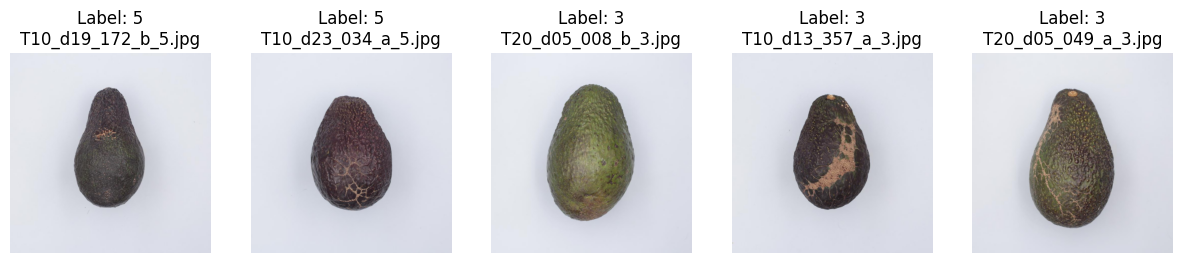

In [ ]:
import os
import shutil
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2

# 指定数据集路径
dataset_path = "/content/drive/MyDrive/Hass Avocado Ripening Photographic Dataset"
excel_path = "/content/drive/MyDrive/Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset.xlsx"
images_folder = os.path.join(dataset_path, "Avocado Ripening Dataset")  # 你的图片存放的文件夹
output_folder = os.path.join(dataset_path, "outfolder")  # 总输出文件夹
train_folder = os.path.join(output_folder, "train")  # 训练集
test_folder = os.path.join(output_folder, "test")  # 测试集

# 读取 Excel 文件
df = pd.read_excel(excel_path)

# Excel 里的列名
filename_col = "File Name"
label_col = "Ripening Index Classification"

# 按标签分类存放文件
label_dict = {}

for index, row in df.iterrows():
    filename = str(row[filename_col]).strip()

    # 如果没有 .jpg 后缀，就加上
    if not filename.lower().endswith(".jpg"):
        filename += ".jpg"

    label = str(row[label_col]).strip()

    # 记录每个标签对应的文件
    if label not in label_dict:
        label_dict[label] = []
    label_dict[label].append(filename)

# 创建 Train/Test 数据集
for label, files in label_dict.items():
    random.shuffle(files)  # 打乱数据
    split_idx = int(len(files) * 0.7)  # 70% 作为训练集

    train_files = files[:split_idx]
    test_files = files[split_idx:]

    # 创建对应的文件夹
    train_label_folder = os.path.join(train_folder, label)
    test_label_folder = os.path.join(test_folder, label)
    os.makedirs(train_label_folder, exist_ok=True)
    os.makedirs(test_label_folder, exist_ok=True)

    # 复制 Train 数据
    for filename in train_files:
        src_path = os.path.join(images_folder, filename)
        dst_path = os.path.join(train_label_folder, filename)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

    # 复制 Test 数据
    for filename in test_files:
        src_path = os.path.join(images_folder, filename)
        dst_path = os.path.join(test_label_folder, filename)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

print("Dataset split into Train (70%) and Test (30%) successfully!")

# 随机选取 5 张测试集图片，显示它们的文件名、标签，并展示图片
num_samples = 5  # 你可以修改这个值，决定随机显示多少张图片
all_test_files = []
for label, files in label_dict.items():
    split_idx = int(len(files) * 0.7)
    all_test_files.extend([(label, f) for f in files[split_idx:]])  # 只取 Test 数据

sample_files = random.sample(all_test_files, min(num_samples, len(all_test_files)))

plt.figure(figsize=(15, 5))

for i, (label, filename) in enumerate(sample_files):
    img_path = os.path.join(test_folder, label, filename)

    if os.path.exists(img_path):
        img = cv2.imread(img_path)  # 读取图片
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转换颜色格式为 RGB

        # 显示图片
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Label: {label}\n{filename}")

plt.show()
